In [2]:
#para mostrar las imagenes en linea con el codigo
%matplotlib inline 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

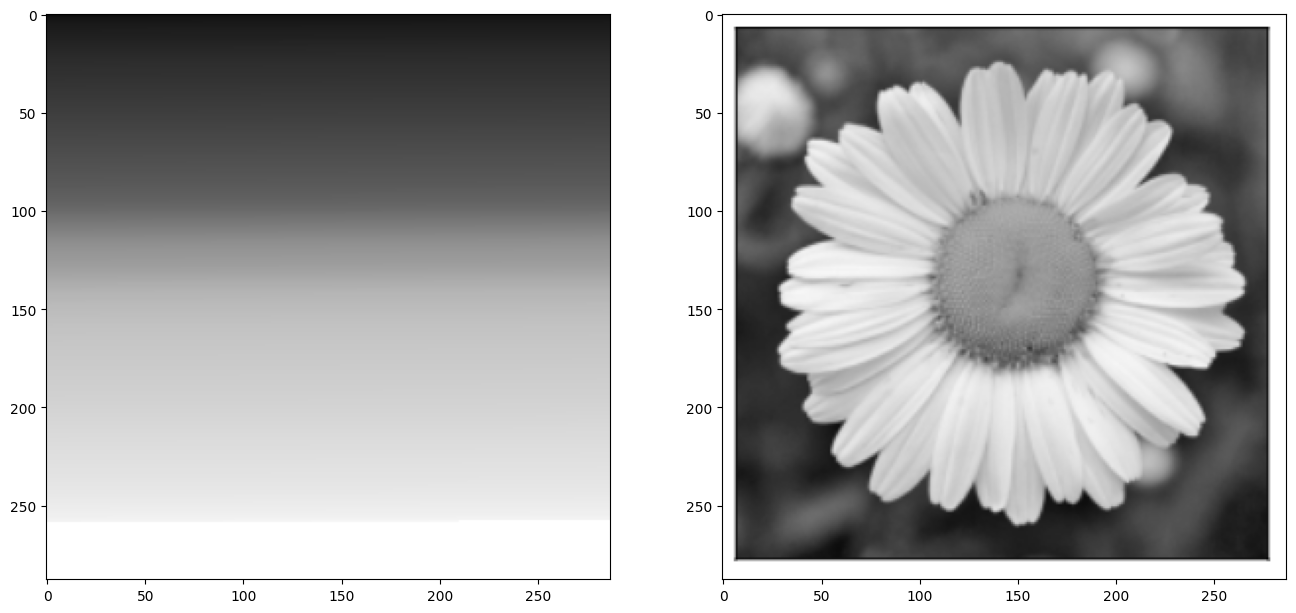

In [3]:
#Se leen las imagenes en escala de grises y se visualizan

img1_gris = cv.imread("img1_tp.png", cv.IMREAD_GRAYSCALE)
img1_gris = cv.cvtColor(img1_gris, cv.COLOR_BGR2RGB)
img2_gris = cv.imread("img2_tp.png", cv.IMREAD_GRAYSCALE)
img2_gris = cv.cvtColor(img2_gris, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(img1_gris)
ax[1].imshow(img2_gris)

plt.show()

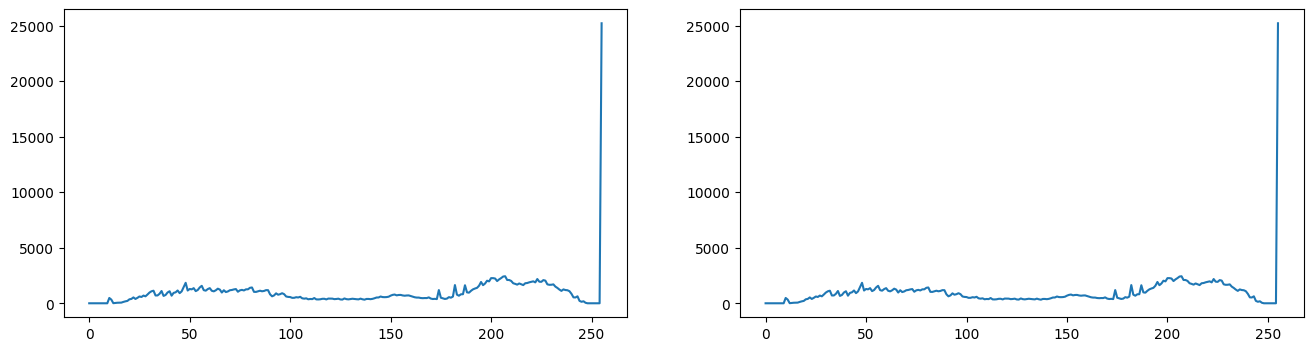

In [4]:
#Se grafican los histogramas de ambas imagenes
hist1, bins = np.histogram(img1_gris,256,[0,256])
hist2, bins = np.histogram(img2_gris,256,[0,256])

fig, ax = plt.subplots(1,2, figsize=(16,4))
ax[0].plot(hist1)
ax[1].plot(hist2)

plt.show()

De la comparación se puede visualizar que ambos histogramas son practicamente iguales. Las cantidades de pixeles con la misma intensidad es similar.
En este caso, no es de utilidad utilizar un histograma para entrenar un modelo de clasificación o detección de imagenes.

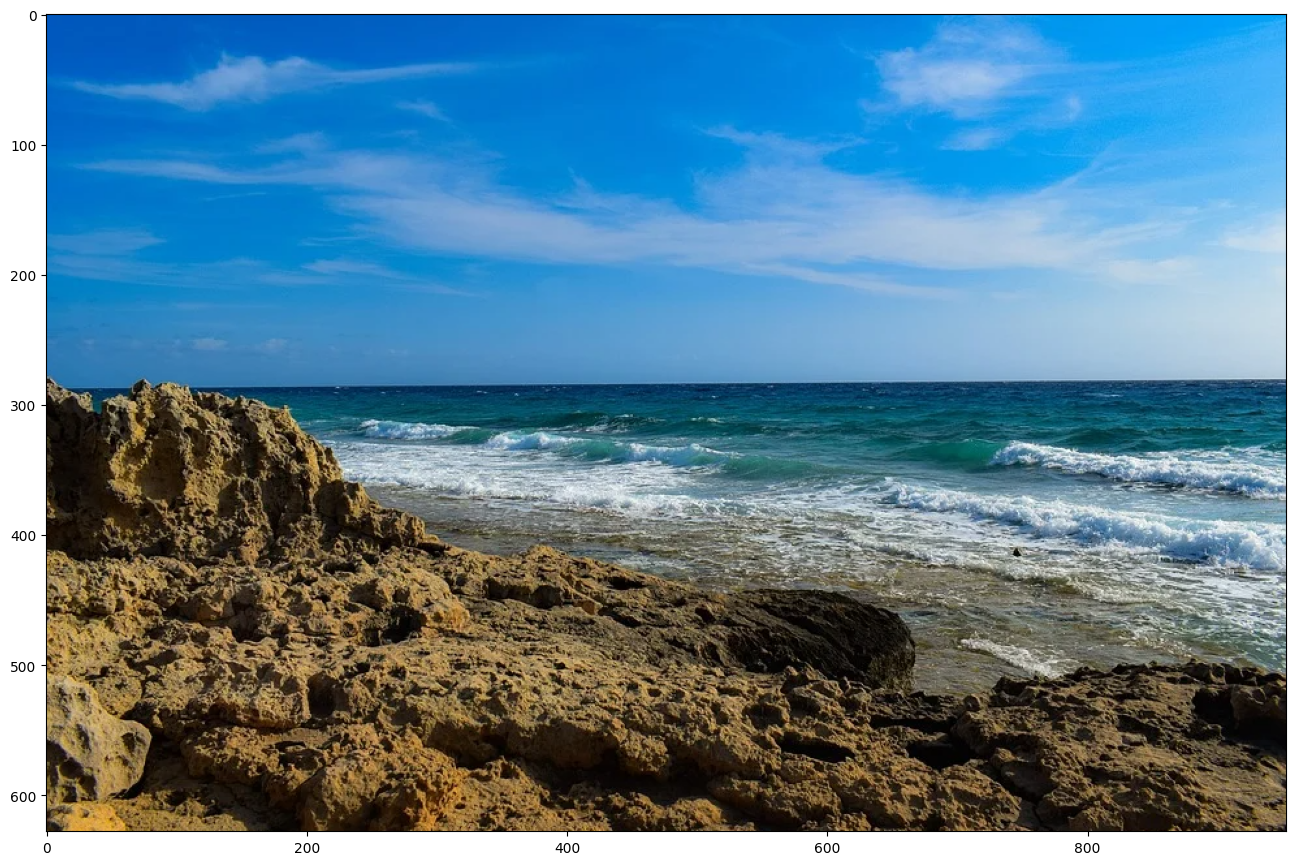

In [5]:
#SEGMENTACIÓN
img_bgr = cv.imread("segmentacion.png")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize=(16,16))
ax.imshow(img_rgb)
plt.show()

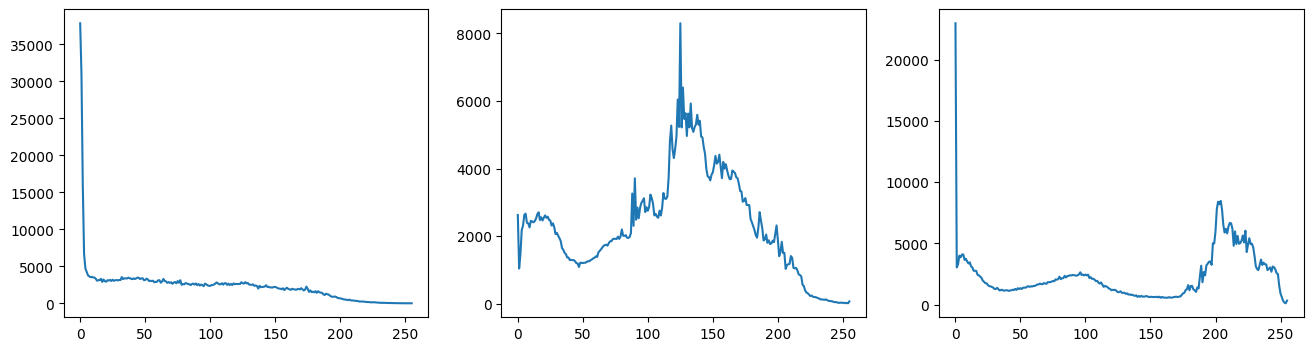

In [9]:
#Se separa la imagen en los tres canales RGB y se grafican los histogramas
img_r, img_g, img_b = cv.split(img_rgb)

hist_r, bins = np.histogram(img_r,256,[0,256])
hist_g, bins = np.histogram(img_g,256,[0,256])
hist_b, bins = np.histogram(img_b,256,[0,256])


fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].plot(hist_r)
ax[1].plot(hist_g)
ax[2].plot(hist_b)

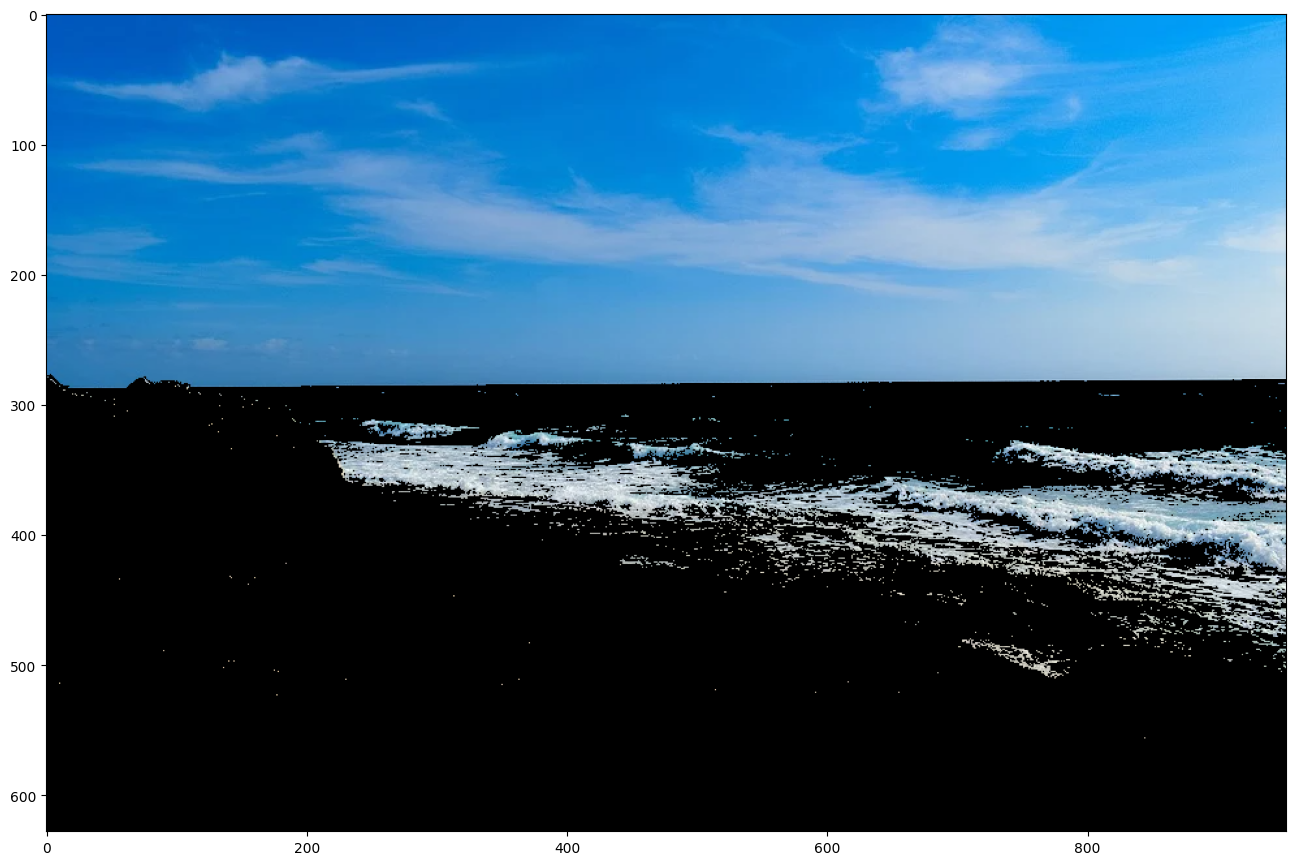

In [20]:
#Se genera una mascara para segmentar el cielo. Se prueban con varios rangos hasta
#sintonzar mejor la segmentación.
mask = cv.inRange(img_rgb, (0,60,160),  (255,255,255))
img_segmentada = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

fig, ax = plt.subplots(1,1, figsize=(16,16))
ax.imshow(img_segmentada[:,:,:])
plt.show()

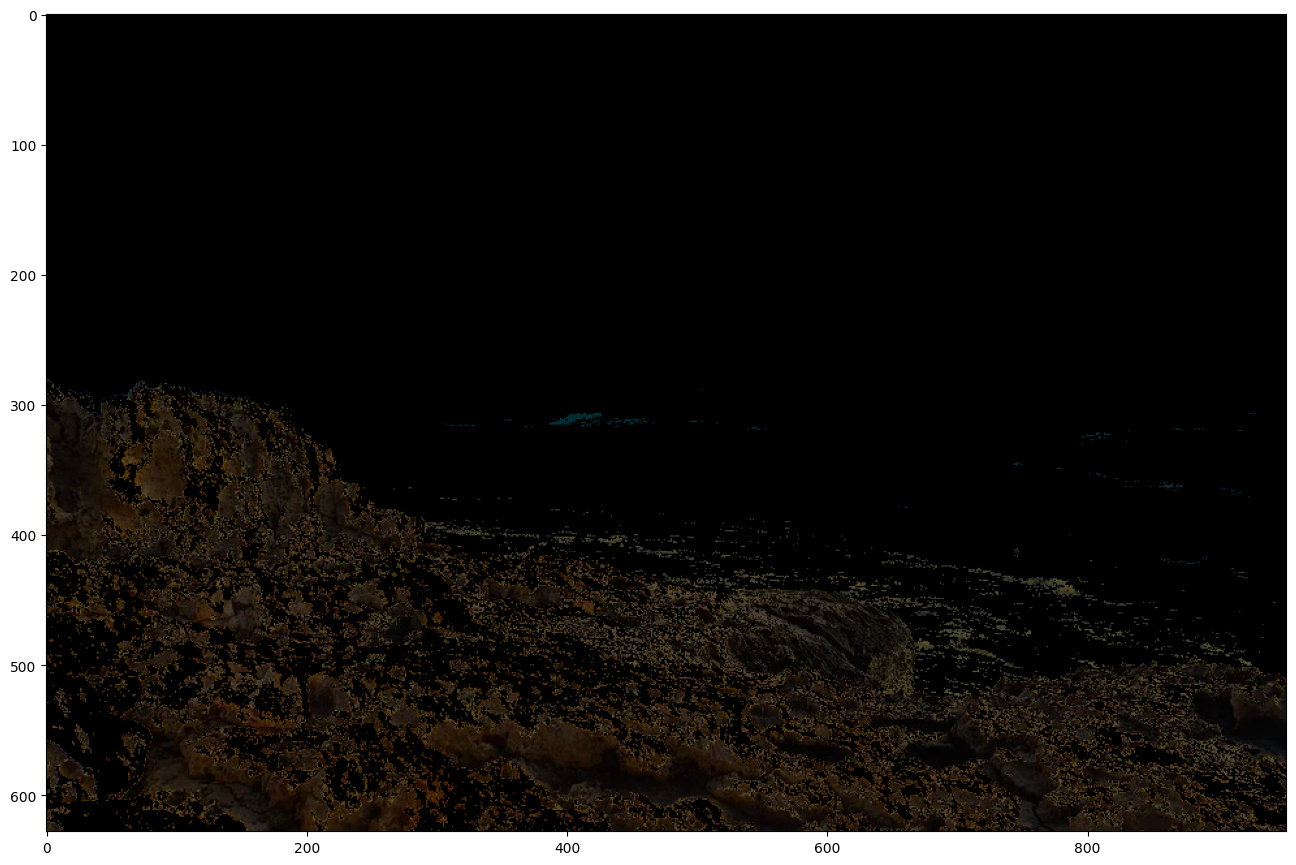

In [24]:
#De forma similar se realiza la segmentación de la tierra.
#Se parte desde 0 y se suprimen los niveles mas altos.
mask = cv.inRange(img_rgb, (0,0,0),  (100,100,60))
img_segmentada = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

fig, ax = plt.subplots(1,1, figsize=(16,16))
ax.imshow(img_segmentada[:,:,:])
plt.show()

Se pudo segmentar la tierra pero se la imagen queda mas oscura ya que se eliminan los pixeles de mayor intensidad con la mascara. Por la ubicacion de la tierra y el cielo, en este caso, se podria "recortar" la imagen y luego aplicar la mascara para mejorar la segmentación.